# Linear Regression

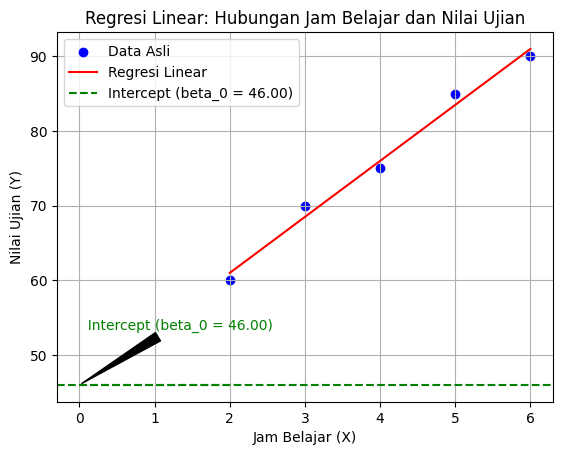

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data
jam_belajar = np.array([2, 3, 4, 5, 6]).reshape(-1, 1)
nilai_ujian = np.array([60, 70, 75, 85, 90])

# Membuat model regresi linear
model = LinearRegression()
model.fit(jam_belajar, nilai_ujian)

# Mendapatkan parameter model
intercept = model.intercept_
slope = model.coef_[0]

# Membuat prediksi
prediksi_nilai = model.predict(jam_belajar)


# Plot hasil regresi
plt.scatter(jam_belajar, nilai_ujian, color='blue', label='Data Asli')
plt.plot(jam_belajar, prediksi_nilai, color='red', label='Regresi Linear')
plt.axhline(intercept, color='green', linestyle='--', label=f'Intercept (beta_0 = {intercept:.2f})')
plt.plot([0, 2], [intercept, intercept], color='green', linestyle='--')  # Garis merah dari intercept ke sumbu X
plt.xlabel('Jam Belajar (X)')
plt.ylabel('Nilai Ujian (Y)')
plt.title('Regresi Linear: Hubungan Jam Belajar dan Nilai Ujian')
plt.legend()

# Anotasi untuk letak beta_0
plt.annotate(f'  Intercept (beta_0 = {intercept:.2f})',
             xy=(0, intercept), xycoords='data',
             xytext=(0, 40), textcoords='offset points',
             arrowprops=dict(facecolor='black', arrowstyle='wedge,tail_width=0.7', lw=1),
             fontsize=10, color='green')

plt.grid(True)  # Menambahkan grid untuk referensi
plt.show()

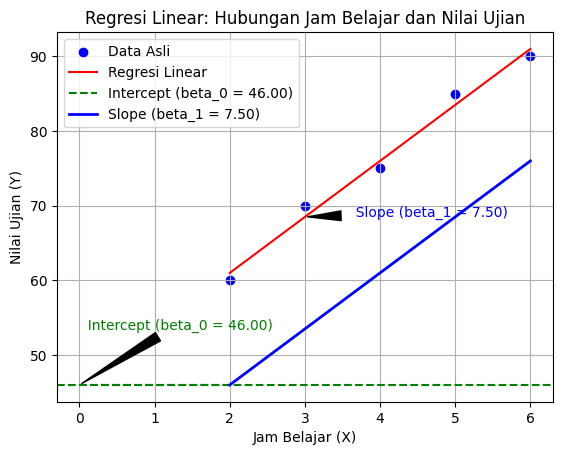

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data
jam_belajar = np.array([2, 3, 4, 5, 6]).reshape(-1, 1)
nilai_ujian = np.array([60, 70, 75, 85, 90])

# Membuat model regresi linear
model = LinearRegression()
model.fit(jam_belajar, nilai_ujian)

# Mendapatkan parameter model
intercept = model.intercept_
slope = model.coef_[0]

# Membuat prediksi
prediksi_nilai = model.predict(jam_belajar)

# Plot hasil regresi
plt.scatter(jam_belajar, nilai_ujian, color='blue', label='Data Asli')
plt.plot(jam_belajar, prediksi_nilai, color='red', label='Regresi Linear')
plt.axhline(intercept, color='green', linestyle='--', label=f'Intercept (beta_0 = {intercept:.2f})')
plt.plot([0, 2], [intercept, intercept], color='green', linestyle='--')  # Garis merah dari intercept ke sumbu X

# Garis biru untuk menunjukkan koefisien regresi (beta_1)
plt.plot([2, 6], [intercept, intercept + slope * 4], color='blue', linestyle='-', linewidth=2, label=f'Slope (beta_1 = {slope:.2f})')

plt.xlabel('Jam Belajar (X)')
plt.ylabel('Nilai Ujian (Y)')
plt.title('Regresi Linear: Hubungan Jam Belajar dan Nilai Ujian')
plt.legend()

# Anotasi untuk letak beta_0 dan beta_1
plt.annotate(f'  Intercept (beta_0 = {intercept:.2f})',
             xy=(0, intercept), xycoords='data',
             xytext=(0, 40), textcoords='offset points',
             arrowprops=dict(facecolor='black', arrowstyle='wedge,tail_width=0.7', lw=1),
             fontsize=10, color='green')

plt.annotate(f'  Slope (beta_1 = {slope:.2f})',
             xy=(3, intercept + slope * 3), xycoords='data',
             xytext=(30, 0), textcoords='offset points',
             arrowprops=dict(facecolor='black', arrowstyle='wedge,tail_width=0.7', lw=1),
             fontsize=10, color='blue')

plt.grid(True)  # Menambahkan grid untuk referensi
plt.show()

### **Menghitung Nilai Slope**

In [ ]:
import numpy as np

# Data
jam_belajar = np.array([2, 3, 4, 5, 6])
nilai_ujian = np.array([60, 70, 75, 85, 90])

# Hitung nilai slope secara manual
n = len(jam_belajar)
sum_x = np.sum(jam_belajar)
sum_y = np.sum(nilai_ujian)
sum_xy = np.sum(jam_belajar * nilai_ujian)
sum_x_squared = np.sum(jam_belajar**2)

# Hitung slope
slope_manual = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x**2)

print(f'Nilai slope (beta_1) secara manual: {slope_manual:.2f}')

Nilai slope (beta_1) secara manual: 7.50


# Introduce - Begin

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
import ipywidgets as widgets
from IPython.display import display
import warnings

# Membaca data dari file CSV
df = pd.read_csv('reg_sample.csv')

# Menggunakan LabelEncoder untuk mengubah data kategorikal (Tempat) menjadi numerik
le_tempat = LabelEncoder()
df['Tempat'] = le_tempat.fit_transform(df['Tempat'])

# Memisahkan fitur dan target
X = df.drop('Harga', axis=1)
y = df['Harga']

# Membangun model Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X, y)

# Fungsi untuk memprediksi harga berdasarkan input pengguna
def predict_price(Kamar, Luas, Tempat):
    try:
        # Transform Tempat using LabelEncoder
        encoded_tempat = le_tempat.transform([Tempat])[0]

        # Check if the encoded_tempat is in the training data
        if not any(X['Tempat'] == encoded_tempat):
            raise ValueError(f"Tempat '{Tempat}' is not in the training data.")

        # Predict the price
        predicted_price = model.predict([[Kamar, Luas, encoded_tempat]])[0]
        return f"Prediksi Harga: {predicted_price}"
    except ValueError as e:
        return f"Error: {str(e)}"

# Buat widget untuk input
kamar_widget = widgets.IntSlider(min=1, max=5, step=1, value=2, description='Kamar')
luas_widget = widgets.IntSlider(min=50, max=300, step=10, value=250, description='Luas')
tempat_widget = widgets.Text(value='Jatinegara', description='Tempat')

# Membuat form interaktif
interact_manual = widgets.interact_manual.options(manual_name="Predict Price")

# Suppress the specific warning about feature names
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

@interact_manual(Kamar=kamar_widget, Luas=luas_widget, Tempat=tempat_widget)
def get_prediction(Kamar, Luas, Tempat):
    prediction = predict_price(Kamar, Luas, Tempat)
    print(prediction)

interactive(children=(IntSlider(value=2, description='Kamar', max=5, min=1), IntSlider(value=250, description=…